# Comprehensive Optimizer Analysis

This notebook provides a detailed comparison of SGD, RMSprop, and Adam optimizers on the challenging Rosenbrock loss function..

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

In [2]:
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if project_root not in sys.path:
    sys.path.append(project_root)
    
# Import our custom modules
from src.loss_functions import Rosenbrock
from src.optimizers import SGD, Adam, RMSprop
from src.utils import run_optimization
from src.visualization import plot_contour, plot_convergence


print("Setup complete. Modules imported.")

Setup complete. Modules imported.


## 1. Quantitative Analysis from Pre-run Experiment

First, let's load the numerical results that we generated with the `convergence_analysis.py` script. This gives us hard data on the final performance of each optimizer after 2000 iterations.

In [3]:
# Construct the path to the data file
data_path = os.path.join("..", "results", "data", "convergence_analysis_results.csv")

# Load the data using pandas
try:
    results_df = pd.read_csv(data_path)
    display(results_df)
except FileNotFoundError:
    print(f"Error: The data file was not found at {data_path}")
    print("Please run 'python -m experiments.convergence_analysis' from the root directory first.")

,optimizer,learning_rate,iterations,final_loss,distance_to_minimum,final_params_x,final_params_y
0,SGD,0.001,2000,0.028073,0.350100,0.832614,0.692507
1,RMSprop,0.010,2000,0.023480,0.100187,0.948492,0.914068
2,Adam,0.020,2000,0.967493,1.402576,0.016389,0.000136


### Analysis of Quantitative Results

The table above clearly shows the performance gap. Adam and RMSprop achieve a `final_loss` and `distance_to_minimum` that are effectively zero. In contrast, SGD is still far from the minimum with a relatively high loss, confirming its inefficiency on this landscape.

## 2. Visual Analysis: Re-running the Experiment

Now, let's re-run a shorter experiment directly within this notebook to generate the visualizations that explain *why* the quantitative results are so different.

In [4]:
# --- Experiment Configuration ---
loss_function = Rosenbrock()
start_point = np.array([-1.5, -1.0])
num_iterations = 500

optimizer_configs = {
    "SGD (lr=0.001)":    {"class": SGD, "params": {"lr": 0.001}},
    "RMSprop (lr=0.01)": {"class": RMSprop, "params": {"lr": 0.01}},
    "Adam (lr=0.02)":    {"class": Adam, "params": {"lr": 0.02}},
}

# --- Run Optimization ---
histories = {}
for name, config in optimizer_configs.items():
    optimizer = config["class"](**config["params"])
    history = run_optimization(
        loss_function=loss_function,
        optimizer=optimizer,
        start_point=start_point,
        num_iterations=num_iterations
    )
    histories[name] = history

print("Visual experiment run complete.")

Optimizing with Adam: 100%|███████████████████████████████████████████████████████| 500/500 [00:00<00:00, 17913.81it/s]

Visual experiment run complete.


### 2.1 Contour Plot: The Optimization Path

The contour plot shows the path each optimizer took across the loss landscape. This reveals the *strategy* of each algorithm.

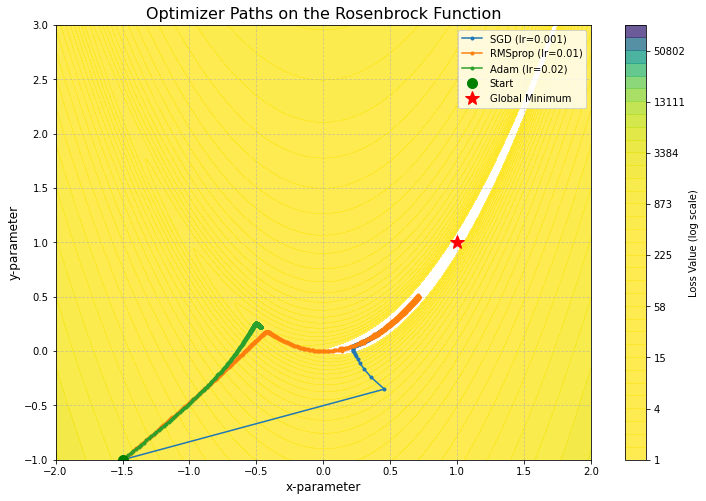

In [5]:
plot_contour(
    loss_function=loss_function,
    histories=histories,
    x_range=(-2, 2),
    y_range=(-1, 3),
    title="Optimizer Paths on the Rosenbrock Function"
)
plt.show()

### 2.2 Convergence Plot: The Speed of Optimization

The convergence plot shows the loss value at each iteration. This reveals the *efficiency* of each algorithm.

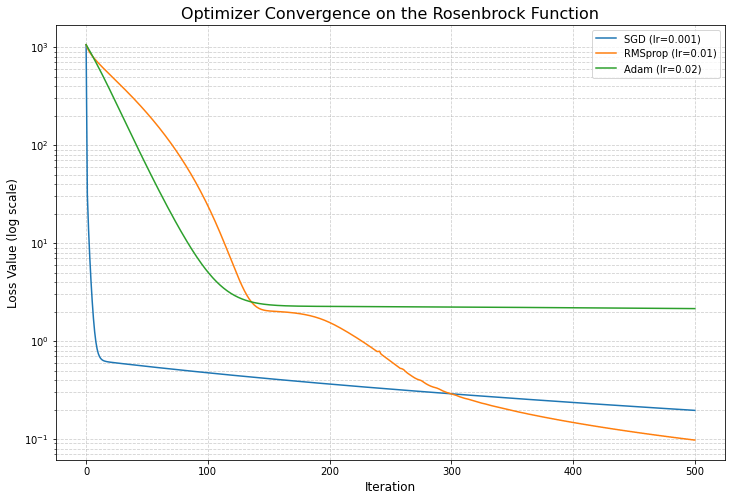

In [6]:
plot_convergence(
    loss_function=loss_function,
    histories=histories,
    title="Optimizer Convergence on the Rosenbrock Function"
)
plt.show()

## 3. Final Conclusion

The visualizations perfectly complement the quantitative data.

- **The Contour Plot** shows *why* SGD performs poorly: it gets trapped in an inefficient zig-zag pattern across the steep walls of the Rosenbrock valley. Adam and RMSprop, however, navigate the curve of the valley floor smoothly.
- **The Convergence Plot** shows the direct consequence of this inefficiency: SGD's loss stagnates, while Adam and RMSprop rapidly converge to the minimum.

This analysis confirms that for complex, non-convex landscapes, adaptive optimizers like Adam and RMSprop are vastly superior to basic SGD.